# Problem Set 1 CS129.18

The following problem set will revolve around hourly Philippine weather data observations from 1978 to 2018 sourced from NOAA (National Oceanic and Atmospheric Administration). 

The dataset `PH_Weather_v1.csv` has **11** columns. The columns are described as follows.

* **datetime** maps to a YYYYMMDDSSSS string datetime format.
* **wind_direction** represents the recorded compass direction of the wind. 
* **wind_speed** is the wind speed recorded in MPH.
* **gust_speed** is the gust speed recorded in MPH. NAN if no recording.
* **sea_level_pressure** is sea level pressure in millibars estimated to the nearest tenth.
* **temperature** is the recorded temperature in celsius.
* **altitude** is the station altimeter recording in inches. NAN if no recording.
* **precipitation** is the station hourly precipitation report in inches. NAN if no recording.
* **clouds** is the station observed cloud report.
    * CLR-CLEAR 
    * SCT-SCATTERED
    * BKN-BROKEN
    * OVC-OVERCAST, 
    * OBS-OBSCURED
    * POB-PARTIAL OBSCURATION 
* **visibility** is the station observed visibility in miles
* **humidity** is the station observed relative humidity

## Requirements


>Atmospheric Science is a complex system that works with factors that interact with each other. We might be able use these variables to estimate the value of one of the key indicators: Temperature.

Using the lessons on Linear Regression I and II, and the other resource notebooks, show the following in this Jupyter Notebook.

Write your answers down as Markdown cells or comments in the code.

-------

In [29]:
%matplotlib inline

import matplotlib.pylab as plt
import numpy as np
import pandas as pd

In [30]:
df = pd.read_csv("data/PH_Weather_v1.csv")
df

,datetime,wind_direction,wind_speed,gust_speed,sea_level_pressure,temperature,altitude,precipitation,clouds,visibility,humidity
0,197809140300,160,2,NaN,1007.7,30,NaN,NaN,BKN,15.6,0.75
1,197810021500,0,0,NaN,1011.3,26,NaN,NaN,OVC,6.2,0.94
2,197810252100,360,9,NaN,1004.1,26,NaN,NaN,BKN,6.2,0.80
3,197810260000,360,21,NaN,1006.3,26,NaN,NaN,OVC,6.2,0.80
4,197811131500,0,0,NaN,1010.1,26,NaN,NaN,BKN,11.2,0.88
...,...,...,...,...,...,...,...,...,...,...,...
90560,201809010900,0,0,NaN,1007.0,28,NaN,NaN,BKN,7.5,0.80
90561,201809011200,70,4,NaN,1008.1,28,NaN,NaN,BKN,7.5,0.86
90562,201809011500,70,4,NaN,1008.9,27,NaN,NaN,BKN,7.5,0.80
90563,201809011800,340,7,NaN,1007.9,27,NaN,NaN,BKN,7.5,0.77


#### **What is the dimensionality or shape of the data?** ( 1pt ) ####
------

In [31]:
df.shape #data has 90565 rows and 11 columns

(90565, 11)

In [32]:
df['precipitation'].value_counts(), df['altitude'].value_counts(), df['gust_speed'].value_counts()

(0.04    6
 0.28    2
 1.14    1
 0.87    1
 0.35    1
 0.08    1
 0.24    1
 Name: precipitation, dtype: int64,
 Series([], Name: altitude, dtype: int64),
 46.0    1
 Name: gust_speed, dtype: int64)

In [33]:
df = df.dropna(axis = 1)
df

,datetime,wind_direction,wind_speed,sea_level_pressure,temperature,clouds,visibility,humidity
0,197809140300,160,2,1007.7,30,BKN,15.6,0.75
1,197810021500,0,0,1011.3,26,OVC,6.2,0.94
2,197810252100,360,9,1004.1,26,BKN,6.2,0.80
3,197810260000,360,21,1006.3,26,OVC,6.2,0.80
4,197811131500,0,0,1010.1,26,BKN,11.2,0.88
...,...,...,...,...,...,...,...,...
90560,201809010900,0,0,1007.0,28,BKN,7.5,0.80
90561,201809011200,70,4,1008.1,28,BKN,7.5,0.86
90562,201809011500,70,4,1008.9,27,BKN,7.5,0.80
90563,201809011800,340,7,1007.9,27,BKN,7.5,0.77


Converts datetime column to datetime format to filter data via date

In [36]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y%m%d%H%M')
df.head()

/tmp/ipykernel_4490/1853866185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime'] = pd.to_datetime(df['datetime'], format='%Y%m%d%H%M')


,datetime,wind_direction,wind_speed,sea_level_pressure,temperature,clouds,visibility,humidity
0,1978-09-14 03:00:00,160,2,1007.7,30,BKN,15.6,0.75
1,1978-10-02 15:00:00,0,0,1011.3,26,OVC,6.2,0.94
2,1978-10-25 21:00:00,360,9,1004.1,26,BKN,6.2,0.80
3,1978-10-26 00:00:00,360,21,1006.3,26,OVC,6.2,0.80
4,1978-11-13 15:00:00,0,0,1010.1,26,BKN,11.2,0.88


In [37]:
df_2017 = df.loc[(df['datetime'] >= '2017-01-01')
                     & (df['datetime'] <= '2017-12-31')]

In [38]:
df_2017.head()

,datetime,wind_direction,wind_speed,sea_level_pressure,temperature,clouds,visibility,humidity
85743,2017-01-01 00:00:00,360,7,1013.9,25,BKN,7.5,0.91
85744,2017-01-01 03:00:00,90,7,1011.8,28,BKN,7.5,0.66
85745,2017-01-01 06:00:00,40,9,1010.7,30,BKN,7.5,0.50
85746,2017-01-01 09:00:00,20,9,1011.1,28,BKN,7.5,0.66
85747,2017-01-01 12:00:00,20,2,1012.9,27,SCT,7.5,0.69


#### **What is mean temperature for the year 2017?** ( 3pts ) #####
---

In [39]:
ave_temp_2017 = df_2017['temperature'].mean()
ave_temp_2017 #outputs the average temperature for the year 2017 equals to 27.9373

27.93734856351679

In [40]:
df['clouds'].value_counts()

OVC    44695
BKN    32618
SCT    13056
***      102
CLR       76
OBS       18
Name: clouds, dtype: int64

Creates dummy variables for each item in *clouds* column

In [41]:
clouds_dummies = pd.get_dummies(df.clouds, prefix='clouds').iloc[:, 1:]
clouds_dummies.head()

,clouds_BKN,clouds_CLR,clouds_OBS,clouds_OVC,clouds_SCT
0,1,0,0,0,0
1,0,0,0,1,0
2,1,0,0,0,0
3,0,0,0,1,0
4,1,0,0,0,0


In [42]:
# concatenate the dummy variable columns onto the data
df = pd.concat([df, clouds_dummies], axis=1)
df.head()

,datetime,wind_direction,wind_speed,sea_level_pressure,temperature,clouds,visibility,humidity,clouds_BKN,clouds_CLR,clouds_OBS,clouds_OVC,clouds_SCT
0,1978-09-14 03:00:00,160,2,1007.7,30,BKN,15.6,0.75,1,0,0,0,0
1,1978-10-02 15:00:00,0,0,1011.3,26,OVC,6.2,0.94,0,0,0,1,0
2,1978-10-25 21:00:00,360,9,1004.1,26,BKN,6.2,0.80,1,0,0,0,0
3,1978-10-26 00:00:00,360,21,1006.3,26,OVC,6.2,0.80,0,0,0,1,0
4,1978-11-13 15:00:00,0,0,1010.1,26,BKN,11.2,0.88,1,0,0,0,0


### Linear Regression Statements

In [43]:
from sklearn.linear_model import LinearRegression

y = df['temperature']
X = df.drop(['datetime', 'temperature', 'clouds'], axis = 1)

In [44]:
X.head()

,wind_direction,wind_speed,sea_level_pressure,visibility,humidity,clouds_BKN,clouds_CLR,clouds_OBS,clouds_OVC,clouds_SCT
0,160,2,1007.7,15.6,0.75,1,0,0,0,0
1,0,0,1011.3,6.2,0.94,0,0,0,1,0
2,360,9,1004.1,6.2,0.80,1,0,0,0,0
3,360,21,1006.3,6.2,0.80,0,0,0,1,0
4,0,0,1010.1,11.2,0.88,1,0,0,0,0


In [45]:
linear_model = LinearRegression()
linear_model.fit(X, y)

LinearRegression()

#### **Solve for the beta coefficients for the columns that you can use in your dataset to predict temperature.** ( 4pts ) ####
---

In [46]:
print(f"Coefficient values{linear_model.coef_}")

Coefficient values[ 1.57300376e-03  8.33329681e-02 -8.11750272e-05  1.18952847e-01
 -1.10033311e+01 -4.58544912e-01 -2.25694594e+00 -1.30976480e+00
 -4.34298371e-01 -8.57427185e-01]


In [47]:
pd.DataFrame(list(zip(X.columns, linear_model.coef_)))

,0,1
0,wind_direction,0.001573
1,wind_speed,0.083333
2,sea_level_pressure,-0.000081
3,visibility,0.118953
4,humidity,-11.003331
5,clouds_BKN,-0.458545
6,clouds_CLR,-2.256946
7,clouds_OBS,-1.309765
8,clouds_OVC,-0.434298
9,clouds_SCT,-0.857427


#### **Show the relationship between the variable with the highest beta coefficient and temperature (Use a plot).** ( 5pts ) ###
---

Text(0.5, 1.0, 'Humidity VS Temperature Values')

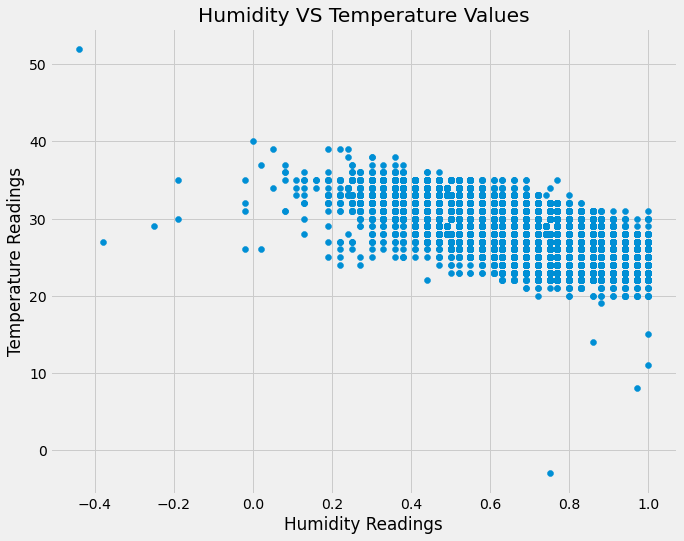

In [48]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))

plt.scatter(df['humidity'], df["temperature"])
plt.xlabel("Humidity Readings")
plt.ylabel("Temperature Readings")
plt.title("Humidity VS Temperature Values")

In [49]:
pred_temp = linear_model.predict(X)

In [50]:
df['prediction'] = pred_temp
df.head()

,datetime,wind_direction,wind_speed,sea_level_pressure,temperature,clouds,visibility,humidity,clouds_BKN,clouds_CLR,clouds_OBS,clouds_OVC,clouds_SCT,prediction
0,1978-09-14 03:00:00,160,2,1007.7,30,BKN,15.6,0.75,1,0,0,0,0,28.825763
1,1978-10-02 15:00:00,0,0,1011.3,26,OVC,6.2,0.94,0,0,0,1,0,25.222581
2,1978-10-25 21:00:00,360,9,1004.1,26,BKN,6.2,0.80,1,0,0,0,0,28.055663
3,1978-10-26 00:00:00,360,21,1006.3,26,OVC,6.2,0.80,0,0,0,1,0,29.079727
4,1978-11-13 15:00:00,0,0,1010.1,26,BKN,11.2,0.88,1,0,0,0,0,26.453396


Text(0.5, 1.0, 'Actual Temperature vs Predicted Temperature')

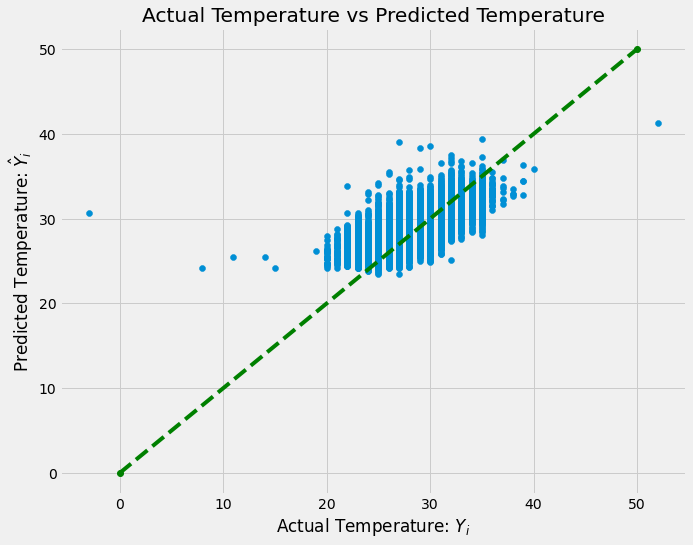

In [51]:
plt.figure(figsize=(10, 8))

plt.scatter(df["temperature"], pred_temp)
plt.plot([0, 50], [0, 50], '--go')
plt.xlabel("Actual Temperature: $Y_i$")
plt.ylabel("Predicted Temperature: $\hat{Y}_i$")
plt.title("Actual Temperature vs Predicted Temperature")

#### **Solve for the Mean Squared Error of your predicted temperature against the actual temperature.** ( 2pts ) ####
---

In [52]:
mean_squared_error = np.mean((df["temperature"] - pred_temp)**2)
mean_squared_error

2.7478861233409355

#### **Solve for the R<sup>2</sup> score of the linear model used to predict temperature.** ( 2pts ) ####
---

In [53]:
linear_model.score(X, df["temperature"])

0.47660101670410704

#### **Identify if the model is a good model and why.** ( 3pts ) ###
---

> It is not a good model. The actual vs predicted temperature plot shows that the residuals are mostly unbiased and normally distributed. Hence, we can use the r-squared score of this model to determine its goodness-of-fit. An r-squared score of .4766 obtained by this model is low for modeling forecasting data.